# 세미 프로잭트
## #01. 작업준비
### 데이터 불러오기

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats



In [73]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,없다,2,abled,nowork,NaN,city,NaN,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,1,abled,work,942.0,city,172.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,4,abled,work,762.0,city,100.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,4,abled,work,855.0,city,268.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,없다,4,abled,work,399.0,city,140.0,21,0.0,0


In [74]:
df.describe()

,Unnamed: 0,age,sm_year,sm_day,health_state,work_code,income,y_total,debt,y_train
count,13474.000000,13474.000000,1119.000000,2036.000000,13474.000000,8058.000000,5393.000000,13474.000000,13474.000000,13474.00000
mean,6736.500000,60.158008,28.122431,14.816306,3.374647,592.239017,273.264417,19.061526,4101.976406,0.13463
std,3889.753098,18.949457,15.676065,7.569475,0.941579,267.824895,214.552707,3.222149,9972.607241,0.34134
min,0.000000,17.000000,0.000000,1.000000,1.000000,111.000000,0.000000,11.000000,0.000000,0.00000
25%,3368.250000,46.000000,16.000000,10.000000,3.000000,314.000000,120.000000,17.000000,0.000000,0.00000
50%,6736.500000,63.000000,29.000000,15.000000,4.000000,611.000000,233.000000,18.000000,0.000000,0.00000
75%,10104.750000,76.000000,40.000000,20.000000,4.000000,873.000000,360.000000,20.000000,4048.750000,0.00000
max,13473.000000,101.000000,72.000000,60.000000,5.000000,1009.000000,2017.000000,42.000000,256400.000000,1.00000


In [75]:
no_debt = df.loc[df['debt']>0,:]
no_debt.head()
no_debt.describe()

,Unnamed: 0,age,sm_year,sm_day,health_state,work_code,income,y_total,debt,y_train
count,5439.000000,5439.000000,384.000000,1054.000000,5439.000000,3818.000000,2803.000000,5439.000000,5439.000000,5439.000000
mean,6041.779923,51.046332,24.924479,14.955408,3.647546,546.680199,318.530146,18.581357,10161.799982,0.095422
std,3737.370940,16.726255,14.962687,7.527027,0.861004,270.474263,215.422921,2.982225,13594.521006,0.293824
min,0.000000,17.000000,0.000000,1.000000,1.000000,111.000000,0.000000,11.000000,3.000000,0.000000
25%,2897.500000,39.000000,11.750000,10.000000,3.000000,312.000000,190.000000,17.000000,2096.000000,0.000000
50%,5626.000000,50.000000,25.000000,15.000000,4.000000,510.000000,270.000000,17.000000,6200.000000,0.000000
75%,9149.500000,63.000000,35.000000,20.000000,4.000000,842.000000,413.500000,19.000000,12997.000000,0.000000
max,13473.000000,101.000000,68.000000,50.000000,5.000000,1009.000000,1905.000000,38.000000,256400.000000,1.000000


<Axes: >

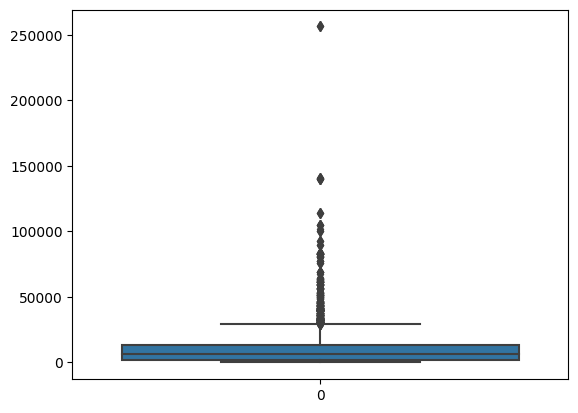

In [76]:
sns.boxplot(no_debt['debt'])

<Axes: xlabel='debt', ylabel='income'>

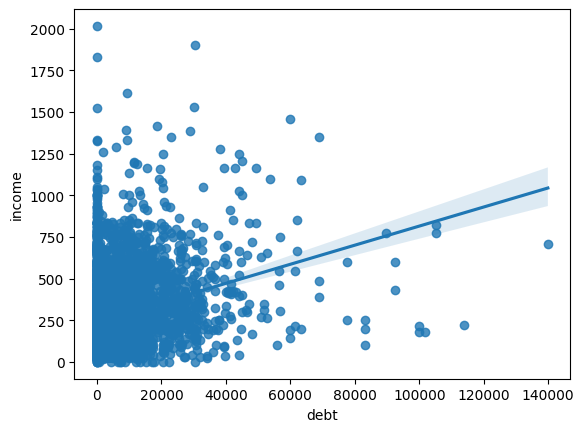

In [77]:
sns.regplot(data=df,x='debt',y='income')

<Axes: xlabel='debt', ylabel='y_total'>

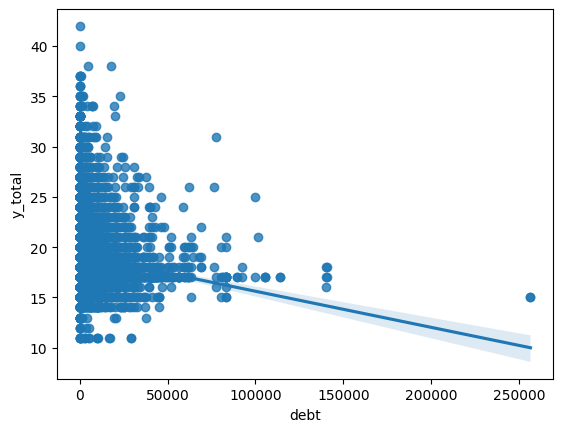

In [78]:
sns.regplot(data=df,x='debt',y='y_total')

In [79]:
corr  = df[['debt','income']].corr()
corr


,debt,income
debt,1.000000,0.270567
income,0.270567,1.000000


In [80]:
corr = df[['age','y_total']].corr(method='pearson')
corr

,age,y_total
age,1.000000,0.301144
y_total,0.301144,1.000000


In [81]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missi

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


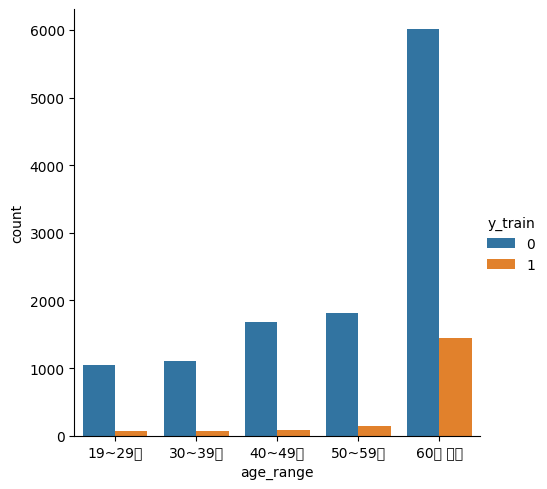

In [82]:
sns.catplot(data=df,x='age_range',kind='count',hue='y_train')

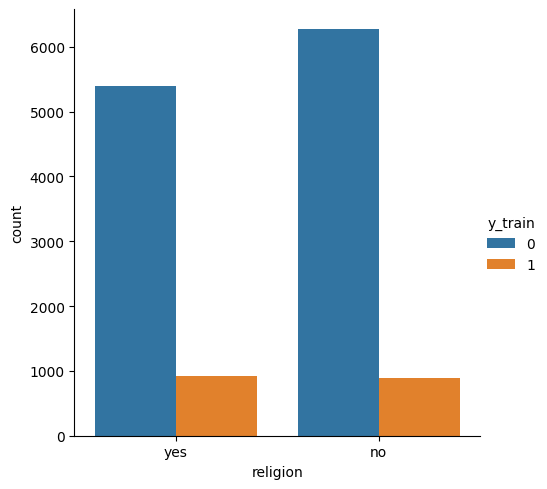

In [83]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

In [84]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 5

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **k

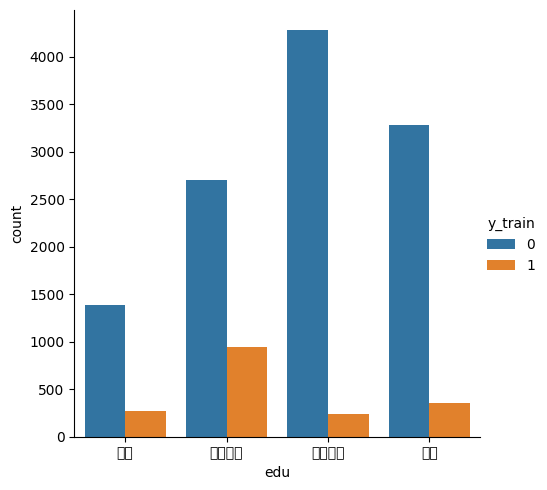

In [85]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')

In [86]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [87]:
df['sm_state'].isnull().sum()

0

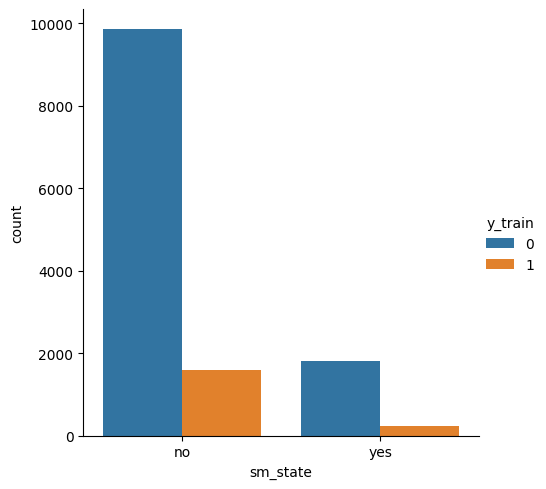

In [88]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [89]:
df['sm_state'].value_counts()

sm_state
no     11438
yes     2036
Name: count, dtype: int64

In [90]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =2036 ,
                            random_state = 2020)
                            


In [91]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()


sm_state
yes    2036
no     2036
Name: count, dtype: int64

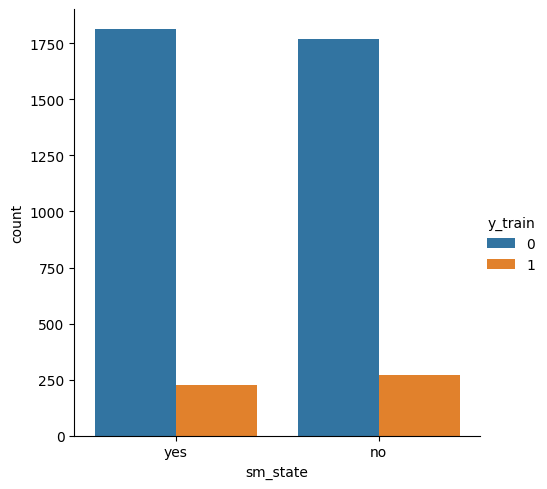

In [92]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

In [93]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

,sm_year,y_total
sm_year,1.000000,0.109959
y_total,0.109959,1.000000


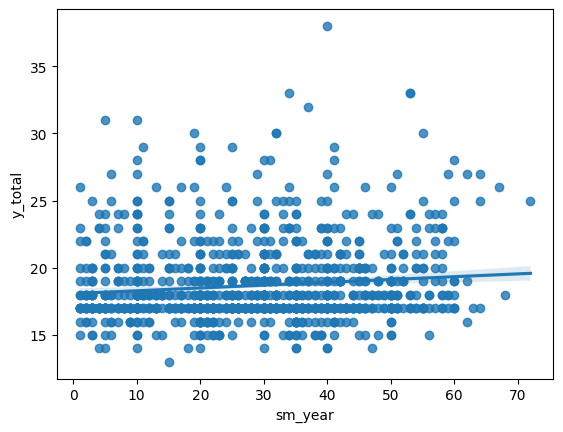

In [94]:
smoking = df.loc[df['sm_year']>0,]

sns.regplot(data=smoking,x='sm_year',y='y_total')
corr = smoking[['sm_year','y_total']].corr(method='pearson')
corr


In [95]:
corr = smoking[['sm_year','y_total']].corr(method='pearson')
corr

,sm_year,y_total
sm_year,1.000000,0.109959
y_total,0.109959,1.000000


In [96]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54784 (\N{HANGUL SYLLABLE HYEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54784 (\N{HANGUL SYLLABLE HYEO}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, *

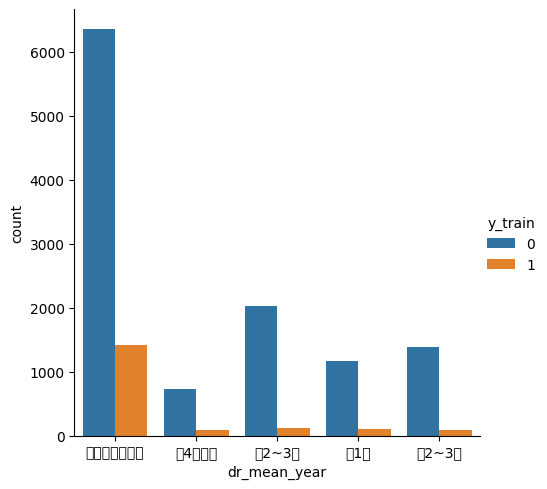

In [97]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [98]:
df['dr_6cup'].unique()

array([nan, '월1회', '연1회', '전혀', '매일', '주1회'], dtype=object)

In [99]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Gl

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54784 (\N{HANGUL SYLLABLE HYEO}) missing from current font.
  func(*ar

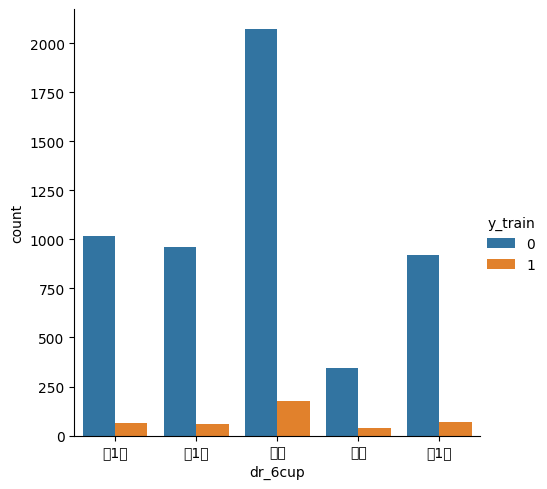

In [100]:
sns.catplot(data=over_dr,x='dr_6cup',kind='count',hue='y_train')

In [101]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [102]:
df['dr_hurt'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

# 다치게한경험 칼럼이랑 걱정시키게한경험 칼럼 없애기 

In [103]:
hurt = df.loc[df['dr_hurt'].notnull(),:]
hurt = hurt.loc[hurt['dr_hurt']!='전혀',:]


In [104]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [105]:
df['preg_experience'].unique()

array(['없다', '남성', '있다'], dtype=object)

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  fig.canvas.draw()
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) 

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from 

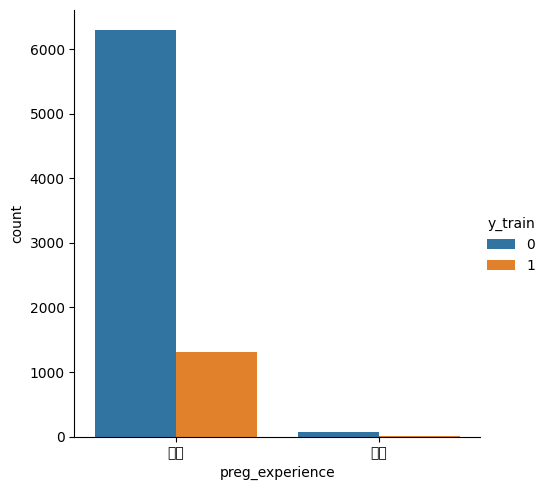

In [106]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [107]:
woman['preg_experience'].value_counts()

preg_experience
없다    7596
있다      86
Name: count, dtype: int64

In [108]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =100 ,
                            random_state = 2020)


In [109]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
없다    100
있다     86
Name: count, dtype: int64

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.draw()
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) m

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from c

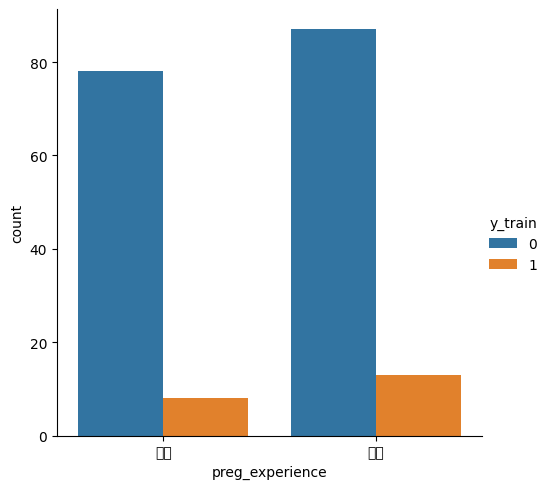

In [110]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

In [111]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [112]:
df['health_state'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

,health_state,y_total
health_state,1.00000,-0.39022
y_total,-0.39022,1.00000


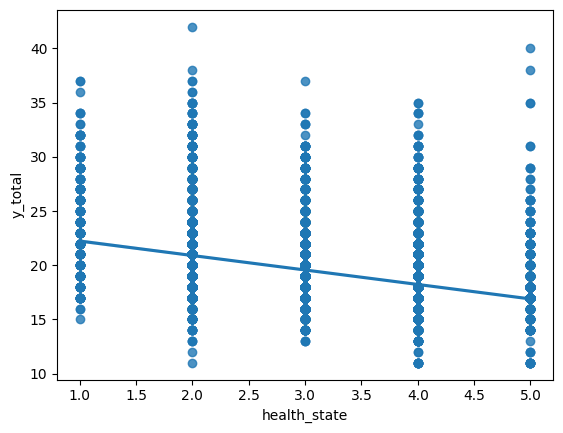

In [113]:

sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

In [114]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [115]:
df['disabled'].value_counts()

disabled
abled       12187
disabled     1287
Name: count, dtype: int64

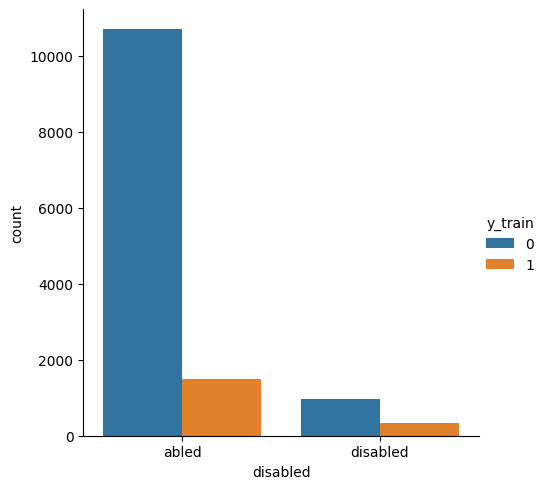

In [116]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [117]:

subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =1287 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
disabled    1287
abled       1287
Name: count, dtype: int64

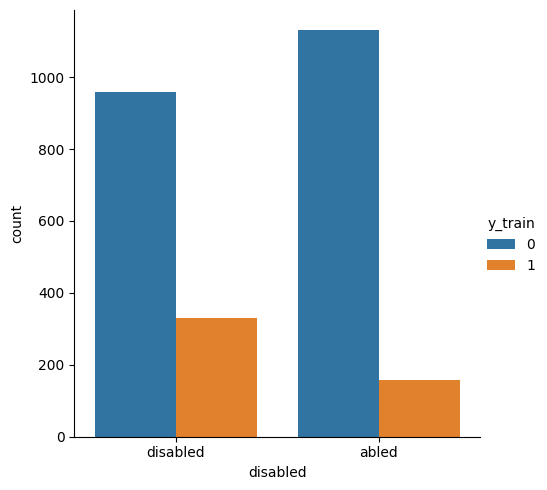

In [118]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [119]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [120]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

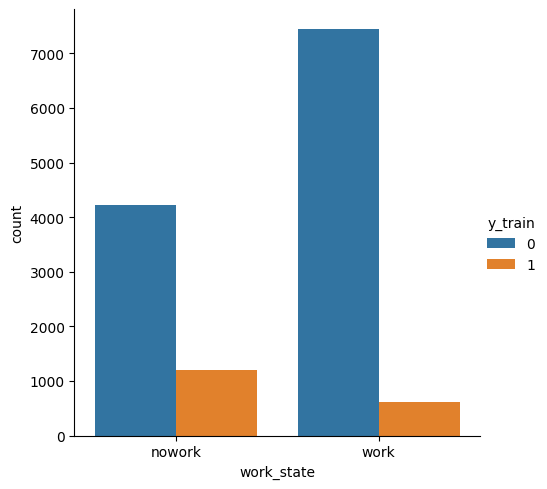

In [121]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

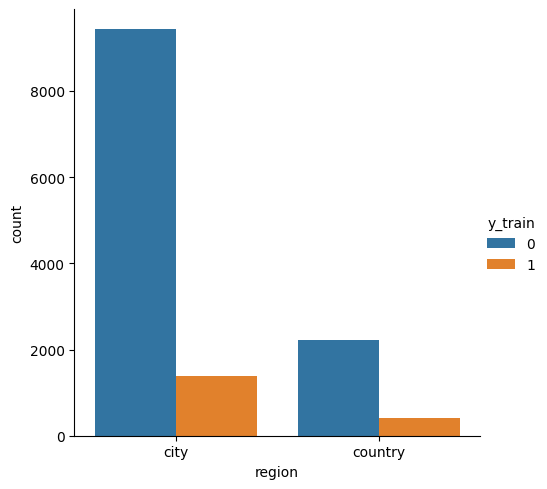

In [122]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [123]:
df['region'].value_counts()

region
city       10826
country     2648
Name: count, dtype: int64

In [124]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =2648 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    2648
city       2648
Name: count, dtype: int64

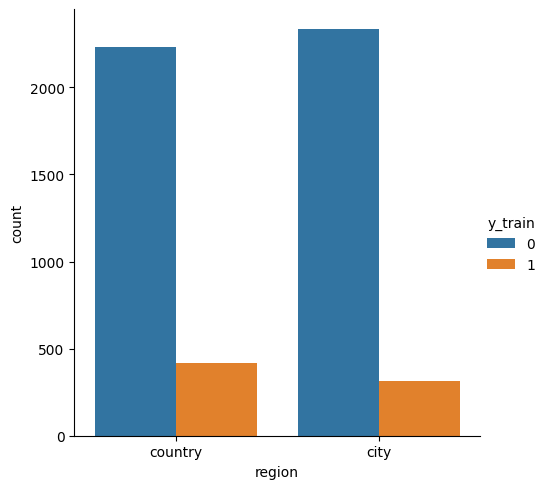

In [125]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

In [126]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

,income,y_total
income,1.000000,-0.212786
y_total,-0.212786,1.000000


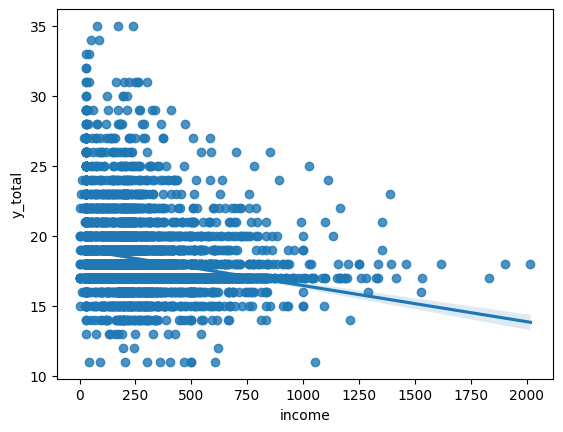

In [127]:

sns.regplot(data=df,x='income',y='y_total')
corr = df[['income','y_total']].corr(method='pearson')
corr

분산분석이던 카이제곱 검정이던 일단 독립변수에 따라 종속변수의 유의미한 차이가 있는지  가설검정

연관성 분석은 했음.

회귀분석 떄리면 됌 (다중회귀분석 + 로지스틱 회귐분석)



In [128]:
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,없다,2,abled,nowork,NaN,city,NaN,20,10350.0,0,60세 이상
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,1,abled,work,942.0,city,172.0,29,0.0,1,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,4,abled,work,762.0,city,100.0,18,21220.0,0,60세 이상
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,4,abled,work,855.0,city,268.0,20,0.0,0,60세 이상
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,없다,4,abled,work,399.0,city,140.0,21,0.0,0,60세 이상


In [129]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [130]:
new_df = df[['gen','age','edu','health_state','disabled','work_state','income','age_range','y_total','y_train']]
new_df.head()

,gen,age,edu,health_state,disabled,work_state,income,age_range,y_total,y_train
0,female,78,중졸,2,abled,nowork,NaN,60세 이상,20,0
1,male,75,초졸이하,1,abled,work,172.0,60세 이상,29,1
2,male,81,대졸이상,4,abled,work,100.0,60세 이상,18,0
3,male,61,대졸이상,4,abled,work,268.0,60세 이상,20,0
4,female,60,고졸,4,abled,work,140.0,60세 이상,21,0


### 범주형 변수들에 대한 시각화 
#### 성별

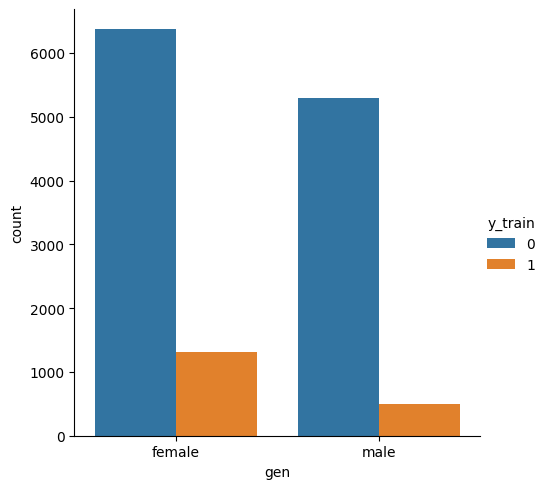

In [131]:
sns.catplot(data = new_df,x='gen',kind='count',hue='y_train')

#### 교육수준

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 5

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **k

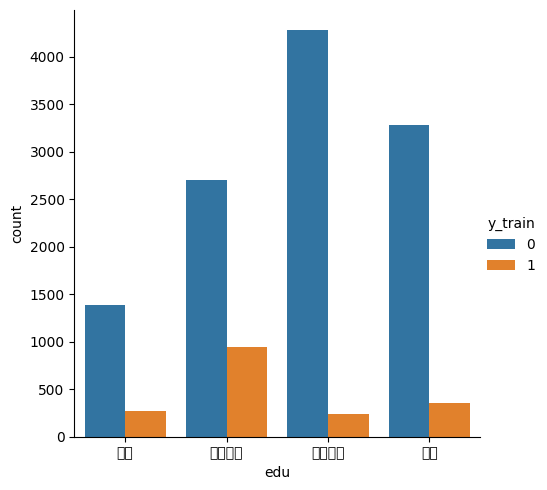

In [132]:
sns.catplot(data = new_df,x='edu',kind='count',hue='y_train')

In [133]:
# 출력 옵션 설정
pd.set_option("display.max_rows", None)  # 모든 행 표시
pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.width", None)  # 줄 바꿈 없이 전체 내용 표시


### 정규성 검정

In [134]:
test_stat,p_val = stats.shapiro(new_df['age'])
print("정규성 검정 결과: statistic =", test_stat, "p-value =", p_val)

정규성 검정 결과: statistic = 0.9617179036140442 p-value = 0.0


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [135]:
test_stat,p_val = stats.shapiro(new_df.loc[new_df['income'].notnull(),"income"])
print("정규성 검정 결과: statistic =", test_stat, "p-value =", p_val)

정규성 검정 결과: statistic = 0.8813180327415466 p-value = 0.0


#### 독립성

In [136]:
t_stat, p_value = ttest_ind(variable1, variable2)
print("독립표본 t-검정 결과: t-statistic =", t_stat, "p-value =", p_value)

NameError: name 'ttest_ind' is not defined

In [ ]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [ ]:
from statsmodels.stats.anova import anova_lm

In [ ]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [ ]:
formula = 'y_train ~ C(gen) * C(age_range)* C(edu) * C(health_state)*C(disabled)*C(work_state)*income'

lm = ols(formula,new_df).fit()
anova = anova_lm(lm)

anova

,df,sum_sq,mean_sq,F,PR(>F)
C(gen),1.0,3.843493,3.843493,62.119841,3.930241e-15
C(age_range),4.0,5.431234,1.357808,21.945361,5.587364e-18
C(edu),3.0,4.654326,1.551442,25.074933,4.249259e-16
C(health_state),4.0,10.290163,2.572541,41.578278,2.393449e-34
C(disabled),1.0,0.081564,0.081564,1.318257,2.509595e-01
C(work_state),1.0,0.287094,0.287094,4.640114,3.128012e-02
C(gen):C(age_range),4.0,0.684300,0.171075,2.764971,2.600809e-02
C(gen):C(edu),3.0,0.069488,0.023163,0.374365,7.715055e-01
C(age_range):C(edu),12.0,0.949892,0.079158,1.279373,2.231430e-01
C(gen):C(health_state),4.0,0.478971,0.119743,1.935324,1.017056e-01


In [ ]:
new_df.head()

,gen,age,edu,health_state,disabled,work_state,income,age_range,y_total,y_train
0,female,78,중졸,2,abled,nowork,NaN,60세 이상,20,0
1,male,75,초졸이하,1,abled,work,172.0,60세 이상,29,1
2,male,81,대졸이상,4,abled,work,100.0,60세 이상,18,0
3,male,61,대졸이상,4,abled,work,268.0,60세 이상,20,0
4,female,60,고졸,4,abled,work,140.0,60세 이상,21,0


In [ ]:
## 딴거 다 포함한 데이터들은 대략적인 시각화를 통해 우울감  0과 1 에 차이가 있는지 대략적인 상관성을 파악해서 잠재변수들을 걸러냈음

## 걸러낸 잠재변수들로부터 독립변수를 선정

## 선정된 독립변수들이 y_total 및 y_train에 통계적으로 유의미한 영향을 미치는지 알아본게 밑에거임

## y_total 우울정도지표인데, 우울감 경험 여부를 나누기 전에, 무엇이 우울정도 지표에 통계적으로 유의한 영향을 미치는지 알아봤다 
## 그결화
## 장애는 우울감 점수의 유의미한 차이가 없음 .
## 나이는 특정나이대범주화 시켜서 분산분석 했다

## y_train

## 각 범주형 및 연속형 변수에 따라 0인지 1인지 빈도수 및 비율을 알아봄으로써 카이제곱 검정을 통해 
## 독립변수가 종속변수에 영향을 미치는지 알아보면 됨 
## 근데 y_train에 대한 검정을 할 때 income은 제외함 -> 연속형 변수기 때문에. 
## 그래서 new_df[['income','y_total']].corr()을 통해 약한 음의 상관관계가 있다는 것과, 아노바를 통해 income에 따라 y_total이 유의미한 차이가 있다고 결과가 
## 나왔기 떄문에 독립변수로써 쓸모가 있음. 
## 밑에서 카이제곱 검정 하겠음.

In [ ]:
new_df[['income','y_total']].corr()

,income,y_total
income,1.000000,-0.212786
y_total,-0.212786,1.000000


In [ ]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [ ]:

result_gen

y_train,0,1
gen,,
female,6370,1312
male,5290,502


In [ ]:
from scipy.stats import chi2_contingency
result_gen = pd.crosstab(new_df['gen'],new_df['y_train'])
chiresult_gen = chi2_contingency(observed=result_gen)
chiresult_gen

Chi2ContingencyResult(statistic=199.8353366379684, pvalue=2.2686379928906813e-45, dof=1, expected_freq=array([[6647.77497402, 1034.22502598],
       [5012.22502598,  779.77497402]]))

In [ ]:
result_age

y_train,0,1
age_range,,
19~29세,1042,71
30~39세,1108,69
40~49세,1678,86
50~59세,1810,144
60세 이상,6009,1439


In [ ]:
result_age = pd.crosstab(new_df['age_range'],new_df['y_train'])
chiresult_age = chi2_contingency(observed=result_age)
chiresult_age

Chi2ContingencyResult(statistic=500.1881601693687, pvalue=6.100389097601047e-107, dof=4, expected_freq=array([[ 963.37031807,  149.62968193],
       [1018.76627527,  158.23372473],
       [1526.85107015,  237.14892985],
       [1691.30781807,  262.69218193],
       [6446.70451843, 1001.29548157]]))

In [ ]:
result_edu

y_train,0,1
edu,,
고졸,3285,358
대졸이상,4281,243
중졸,1392,271
초졸이하,2702,942


In [ ]:
result_edu = pd.crosstab(new_df['edu'],new_df['y_train'])
chiresult_edu = chi2_contingency(observed=result_edu)
chiresult_edu

Chi2ContingencyResult(statistic=787.0129591697416, pvalue=2.8365412580622276e-170, dof=3, expected_freq=array([[3152.54415912,  490.45584088],
       [3914.9354312 ,  609.0645688 ],
       [1439.11088021,  223.88911979],
       [3153.40952946,  490.59047054]]))

In [ ]:
result_health_state

y_train,0,1
health_state,,
1,112,130
2,1873,815
3,2843,461
4,5897,363
5,935,45


In [ ]:
result_health_state = pd.crosstab(new_df['health_state'],new_df['y_train'])
chiresult_health_state = chi2_contingency(observed=result_health_state)
chiresult_health_state

Chi2ContingencyResult(statistic=1374.7283108106578, pvalue=2.0862122777445187e-296, dof=4, expected_freq=array([[ 209.41962298,   32.58037702],
       [2326.11548167,  361.88451833],
       [2859.18361288,  444.81638712],
       [5417.21834645,  842.78165355],
       [ 848.06293602,  131.93706398]]))

In [ ]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [ ]:
result_disabled

y_train,0,1
disabled,,
abled,10702,1485
disabled,958,329


In [ ]:
result_disabled = pd.crosstab(new_df['disabled'],new_df['y_train'])
chiresult_disabled = chi2_contingency(observed=result_disabled)
chiresult_disabled

Chi2ContingencyResult(statistic=177.6801371080632, pvalue=1.5558162389120512e-40, dof=1, expected_freq=array([[10546.26836871,  1640.73163129],
       [ 1113.73163129,   173.26836871]]))

In [ ]:
result_work_state = pd.crosstab(new_df['work_state'],new_df['y_train'])
chiresult_work_state = chi2_contingency(observed=result_work_state)
chiresult_work_state

Chi2ContingencyResult(statistic=573.851381337482, pvalue=8.157228625223528e-127, dof=1, expected_freq=array([[4686.84577705,  729.15422295],
       [6973.15422295, 1084.84577705]]))

In [ ]:
### 의미있는거 확인해봄 


In [ ]:
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,NaN,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,172.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,100.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,268.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,140.0,21,0.0,0


In [ ]:
condition = (
    ((df['work_code']>=100) & (df['work_code']<200)),
    ((df['work_code']>=300) & (df['work_code']<400)),
    ((df['work_code']>=400) & (df['work_code']<500)),
    ((df['work_code']>=600) & (df['work_code']<700)),
    ((df['work_code']>=700) & (df['work_code']<800))
)
value = ['관리직','사무종사자','서비스판매','농업','기능노무']
df['work_code'] = np.select(condition,value,default=0)
df['work_code'].unique()



TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
new_df = df.loc[df['work_code']!="0",:]
new_df['work_code'].unique()

array(['기능노무', '사무종사자', '관리직', '서비스판매', '농업'], dtype=object)

In [ ]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

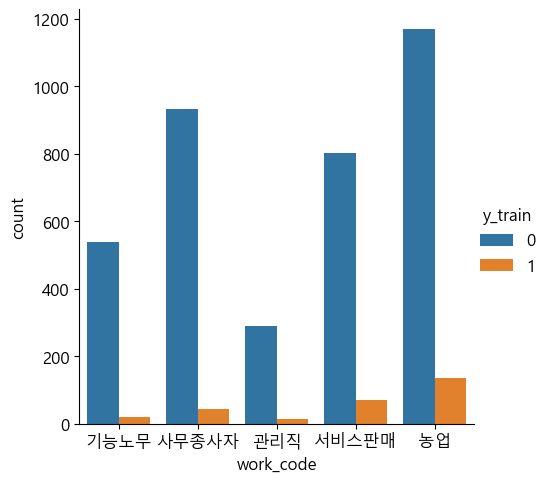

In [ ]:
sns.catplot(data=new_df,x='work_code',kind='count',hue='y_train')
plt.show()
plt.close()

In [ ]:
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,0,city,NaN,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,0,city,172.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,기능노무,city,100.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,0,city,268.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,사무종사자,city,140.0,21,0.0,0


In [ ]:
income_df = df.loc[df['income']>=0,['income','y_train']]


,income,y_train
1,172.0,1
2,100.0,0
3,268.0,0
4,140.0,0
7,27.0,0


In [ ]:
y_train_0 = income_df.loc[income_df['y_train']==0,:]
y_train_1 = income_df.loc[income_df['y_train']==1,:]
y_train_1.head()

,income,y_train
1,172.0,1
14,217.0,1
36,260.0,1
69,850.0,1
140,109.0,1


In [ ]:
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner,levene, f_oneway, chi2_contingency


In [ ]:
ks_2samp(y_train_0['income'],y_train_1['income'])
## 두 집단의 분포가 다름

KstestResult(statistic=0.2958633909646609, pvalue=5.398489304203881e-29, statistic_location=214.0, statistic_sign=-1)

In [ ]:
levene(y_train_0['income'],y_train_1['income'])
## 등분산 성립 x 

LeveneResult(statistic=18.982462718853665, pvalue=1.343747996572215e-05)

In [ ]:
stats.ttest_ind(y_train_0['income'],y_train_1['income'],equal_var=False)

TtestResult(statistic=12.789949151206441, pvalue=1.3524401553843208e-32, df=498.92152142495837)

0.0

## 부채 사전분석 + 분산분석

In [ ]:
debt_df = df.loc[df['debt']>=0,['debt','y_train']]


In [ ]:
y_train_0_debt = debt_df.loc[debt_df['y_train']==0,:]
y_train_1_debt = debt_df.loc[debt_df['y_train']==1,:]


In [ ]:
ks_2samp(y_train_0_debt['debt'],y_train_1_debt['debt'])


KstestResult(statistic=0.14451521518360144, pvalue=4.4591301198427757e-29, statistic_location=762.0, statistic_sign=-1)

In [ ]:
stats.ttest_ind(y_train_0_debt['debt'],y_train_1_debt['debt'],equal_var=False)

TtestResult(statistic=12.737536364884129, pvalue=2.436124424470931e-36, df=3405.8284198059505)

In [ ]:
남여에 따라 박스플롯 차이
x- 남자
y - y_total

범주형에 따른 상관성을 종속변수를 범주화시켜서 빈도수의 차이를 봤다 .

In [ ]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train'],
      dtype='object')

종ㅇ속변수가 
y_total -> 성별
남 여자 성별에 따른 y_total 차이가 있는가 ? 
교육수준 4개죠 